# Investment Analysis Assignment

##    Checkpoints - Part 1 (Checkpoint 1: Data Cleaning 1)


In [1]:
# Load the companies, rounds2 and mapping data into data frames.
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
companies = pd.read_csv("data/companies.txt", sep="\t", encoding="ISO-8859-1")
rounds2 = pd.read_csv("data/rounds2.csv", encoding = "ISO-8859-1")
mapping = pd.read_csv("data/mapping.csv", encoding = "ISO-8859-1")

In [2]:
# Checking sample data
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [3]:
# Checking sample data
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan


In [4]:
# Checking sample data
mapping.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


In [5]:
# Converting permlink to lower case to make sure join between companies and rounds2 works properly
companies['permalink'] = companies['permalink'].str.lower()
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


In [6]:
# Converting company_permalink to lower case to make sure join between companies and rounds2 works properly
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan


In [7]:
# Finding total count of rows in Companies data frame 
companies["permalink"].count()

66368

In [8]:
# Finding count of unique companies in companies data frame using "permalink" column, since it is unique.
len(companies.permalink.unique())

66368

In [9]:
# Finding total count of rows in rounds2 data frame 
rounds2["company_permalink"].count()

114949

In [10]:
# Finding count of unique companies in rounds2 data frame using "company_permalink" column, since it is unique.
len(rounds2.company_permalink.unique())

66370

In [11]:
# Finding total count of rows in Mapping data frame 
mapping["category_list"].count()

687

In [12]:
# Finding count of unique category_list in mapping Data Frame using "category_list" column, since it is unique.
len(mapping.category_list.unique())

688

In [13]:
# To find if there are any companies in the rounds2 file which are not present in companies ?

master_frame_LOJ = pd.merge(rounds2, companies , how='left', left_on = 'company_permalink', right_on = 'permalink') 
master_frame_missing_companies = master_frame_LOJ[master_frame_LOJ['permalink'].isnull()]
master_frame_missing_companies

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
master_frame_missing_companies['company_permalink'].count()

7

In [15]:
# Since master_frame_missing_companies data frame has records,
# There are companies in the rounds2 file which are not present in companies 

 #### Merging rounds2 and companies data frame

In [16]:
# Merge the two data frames (rounds2 and companies),
# so that all  variables (columns) in the companies frame are added to the rounds2 data frame. 
master_frame = pd.merge(rounds2, companies , how='inner', left_on = 'company_permalink', right_on = 'permalink')
master_frame.head(5) 

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [17]:
master_frame['company_permalink'].count()

114942

In [18]:
master_frame.shape

(114942, 16)

In [19]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [20]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [21]:
# Since we have 19984 NULL values in raised_amount_usd, 
# Which is not going to contribute to any analysis, I am dropping those rows.
master_frame = master_frame[master_frame['raised_amount_usd'].notnull()]

In [22]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66789
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
dtype: int64




## Checkpoints - Part 1 (Checkpoint 2: Funding Type Analysis)

In [23]:
# Average funding amount by Investment Type
df_by_funding_type_mean = master_frame.groupby('funding_round_type')['raised_amount_usd'].mean()
df_by_funding_type_mean.sort_values(ascending=False)

funding_round_type
post_ipo_debt           168704571.82
post_ipo_equity          82182493.87
secondary_market         79649630.10
private_equity           73308593.03
undisclosed              19242370.23
debt_financing           17043526.02
venture                  11748949.13
grant                     4300576.34
convertible_note          1453438.54
product_crowdfunding      1363131.07
angel                      958694.47
seed                       719779.62
equity_crowdfunding        538368.21
non_equity_assistance      411203.05
Name: raised_amount_usd, dtype: float64

In [24]:
# Investment Count by Investment Type
df_by_funding_type_mean = master_frame.groupby('funding_round_type')['raised_amount_usd'].count()
df_by_funding_type_mean.sort_values(ascending=False)

funding_round_type
venture                  50228
seed                     23602
debt_financing            6682
angel                     4860
grant                     2124
private_equity            1936
undisclosed               1582
convertible_note          1447
equity_crowdfunding       1228
post_ipo_equity            628
product_crowdfunding       386
post_ipo_debt              152
non_equity_assistance       73
secondary_market            30
Name: raised_amount_usd, dtype: int64

In [25]:
# Total funding amount by Investment Type
df_by_funding_type_mean = master_frame.groupby('funding_round_type')['raised_amount_usd'].sum()
df_by_funding_type_mean.sort_values(ascending=False)

funding_round_type
venture                 590126216876.00
private_equity          141925436105.00
debt_financing          113884840886.00
post_ipo_equity          51610606151.00
undisclosed              30441429697.00
post_ipo_debt            25643094917.00
seed                     16988238596.00
grant                     9134424145.00
angel                     4659255123.00
secondary_market          2389488903.00
convertible_note          2103125572.00
equity_crowdfunding        661116163.00
product_crowdfunding       526168593.00
non_equity_assistance       30017823.00
Name: raised_amount_usd, dtype: float64



## Checkpoints - Part 2 (Checkpoint 3: Country Analysis)

In [26]:
master_frame_filter_venture = master_frame[master_frame['funding_round_type'] == 'venture']
df_raised_fund_type_venture_by_country = master_frame_filter_venture.groupby('country_code')['raised_amount_usd'].sum()
df_raised_fund_type_venture_by_country = df_raised_fund_type_venture_by_country.reset_index()
top9 = df_raised_fund_type_venture_by_country.sort_values(by='raised_amount_usd', ascending=False).head(9).reset_index(drop=True)
df_raised_fund_type_venture_by_country.sort_values(by='raised_amount_usd', ascending=False).head(9) 

,country_code,raised_amount_usd
94,USA,422510842796.00
15,CHN,39835418773.00
29,GBR,20245627416.00
39,IND,14391858718.00
12,CAN,9583332317.00
28,FRA,7259536732.00
42,ISR,6907514579.00
21,DEU,6346959822.00
45,JPN,3363676611.00




## Checkpoints - Part 2 (Checkpoint 4: Sector Analysis 1)

In [27]:
# Validating distinct value of category_list in mapping (csv) data frame
mapping.category_list.sort_values(ascending=True).head(10)

471                 0notechnology
472    0tural Language Processing
473              0tural Resources
474                     0vigation
1                              3D
2                     3D Printing
3                   3D Technology
22                       A0lytics
4                      Accounting
5                Active Lifestyle
Name: category_list, dtype: object

In [28]:
# Since mapping csv file has few wrong category_list values. 
# 0 present instead of na in many places like "0notechnology", "0tural Language Processing", etc...
# So I am replacing "0" as "na".
mapping.category_list = mapping.category_list.str.replace("0", "na")

In [29]:
# Validating distinct value of category_list in mapping (csv) data frame
mapping.category_list.sort_values(ascending=True).head(10)

1                        3D
2               3D Printing
3             3D Technology
4                Accounting
5          Active Lifestyle
6              Ad Targeting
7        Advanced Materials
8          Adventure Travel
9               Advertising
10    Advertising Exchanges
Name: category_list, dtype: object

In [30]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [31]:
# Constructing the dataframe which will have primary_sector and main_sector columns
mapping_melt = pd.melt(mapping, id_vars=['category_list'])
mapping_melt_check = mapping_melt[mapping_melt['value'].isin([1])]  
mapping_join = mapping_melt_check.drop('value', axis=1 ).reset_index(drop=True)
mapping_join.rename(columns={'category_list':'primary_sector','variable':'main_sector'}, inplace=True)
# Converting primary_sector to lower case for Join condition purpose. 
mapping_join['primary_sector'] = mapping_join['primary_sector'].str.lower()

In [32]:
mapping_join.head(25) 

,primary_sector,main_sector
0,adventure travel,Automotive & Sports
1,aerospace,Automotive & Sports
2,auto,Automotive & Sports
3,automated kiosk,Automotive & Sports
4,automotive,Automotive & Sports
5,bicycles,Automotive & Sports
6,boating industry,Automotive & Sports
7,cad,Automotive & Sports
8,cars,Automotive & Sports
9,design,Automotive & Sports


In [33]:
# Defining function required for extracting the primary sector of each category list from the category_list column
def get_primary_category(category_list):
    category_list_values = category_list.split('|')
    if len(category_list_values) > 1:
        return category_list_values[0]
    else:
        return category_list

In [34]:
# Extracting top three English-speaking countries in the data frame top9. 
# Top 3 countries are identified as USA, GBR and IND already from top9. 
top3_english_countries = master_frame_filter_venture[master_frame_filter_venture['country_code'].isin(['USA','GBR','IND'])] 

# To avoid any conflict in join and group by, I am replacing NULL value as undefined. 
top3_english_countries['category_list'].fillna('undefined', inplace = True)
top3_english_countries['country_code'].fillna('undefined', inplace = True)

# Extract the primary sector of each category list from the category_list column required for the join condition. 
top3_english_countries['primary_sector'] = top3_english_countries['category_list'].apply(get_primary_category).str.lower()
top3_english = top3_english_countries
top3_english.head(5)

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps


In [35]:
top3_english.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         17816
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           0
homepage_url                1857
category_list                  0
status                         0
country_code                   0
state_code                    73
region                       158
city                         158
founded_at                  6326
primary_sector                 0
dtype: int64

In [36]:
# Merging Top 3 Country dataframe with mapping data to get the sector value
merged_data_frame = pd.merge(top3_english, mapping_join , how='inner', left_on = 'primary_sector', right_on = 'primary_sector')
merged_data_frame.head(5) 

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.00,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,media,Entertainment


In [37]:
merged_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
company_permalink          38788 non-null object
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funding_round_code         21079 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
permalink                  38788 non-null object
name                       38788 non-null object
homepage_url               36998 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
state_code                 38716 non-null object
region                     38632 non-null object
city                       38632 non-null object
founded_at                 32614 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: 



## Checkpoints - Part 2 (Checkpoint 5: Sector Analysis 2)

In [38]:
# To extract investments with a range of 5-15 M USD, as mentioned by Apark Fund Constraints. 
merged_data_frame = merged_data_frame.drop(merged_data_frame[(merged_data_frame.raised_amount_usd < 5000000)].index)
merged_data_frame = merged_data_frame.drop(merged_data_frame[(merged_data_frame.raised_amount_usd > 15000000)].index)


In [39]:
merged_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13012 entries, 0 to 38781
Data columns (total 18 columns):
company_permalink          13012 non-null object
funding_round_permalink    13012 non-null object
funding_round_type         13012 non-null object
funding_round_code         9231 non-null object
funded_at                  13012 non-null object
raised_amount_usd          13012 non-null float64
permalink                  13012 non-null object
name                       13012 non-null object
homepage_url               12412 non-null object
category_list              13012 non-null object
status                     13012 non-null object
country_code               13012 non-null object
state_code                 12995 non-null object
region                     12973 non-null object
city                       12973 non-null object
founded_at                 11170 non-null object
primary_sector             13012 non-null object
main_sector                13012 non-null object
dtypes: f

In [40]:
D1 = merged_data_frame[merged_data_frame['country_code']=='USA'] 

D2 = merged_data_frame[merged_data_frame['country_code']=='GBR'] 

D3 = merged_data_frame[merged_data_frame['country_code']=='IND'] 

# D1 = USA

In [41]:
D1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,1454104361.00
Cleantech / Semiconductors,2350,21633430822.00
Entertainment,591,5099197982.00
Health,909,8211859357.00
Manufacturing,799,7258553378.00
"News, Search and Messaging",1583,13971567428.00
Others,2950,26321007002.00
"Social, Finance, Analytics, Advertising",2714,23807376964.00


In [42]:
# D1 - Total number of investments (count)
D1['raised_amount_usd'].count()

12063

In [43]:
# D1 - Total amount of investment (USD)
D1['raised_amount_usd'].sum()

107757097294.0

In [44]:
# D1 - Top sector (based on count of investments) and Number of investments in decending order
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [45]:
# D1 - Top sector (based on investments)
D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                    26321007002.00
Social, Finance, Analytics, Advertising   23807376964.00
Cleantech / Semiconductors                21633430822.00
News, Search and Messaging                13971567428.00
Health                                     8211859357.00
Manufacturing                              7258553378.00
Entertainment                              5099197982.00
Automotive & Sports                        1454104361.00
Name: raised_amount_usd, dtype: float64

#### Top 3 Sectors in D1 - USA by Investment count are 
#### 1) Others                                       
#### 2) Social, Finance, Analytics, Advertising                
#### 3) Cleantech / Semiconductors

In [46]:
# D1 - For the top sector count-wise , which company received the highest investment?
D1_no1_sector_companies = D1[D1['main_sector']== "Others"]
D1_no1_sector_companies.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(5) 

permalink                          name               
/organization/virtustream          Virtustream           64300000.00
/organization/capella              Capella Photonics     54968051.00
/organization/airtight-networks    AirTight Networks     54201907.00
/organization/decarta              deCarta               52100000.00
/organization/black-duck-software  Black Duck Software   51000000.00
Name: raised_amount_usd, dtype: float64

In [47]:
# D1 - For the second-best sector count-wise, which company received the highest investment?
D1_no2_sector_companies = D1[D1['main_sector']== "Social, Finance, Analytics, Advertising"]
D1_no2_sector_companies.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(5) 

permalink                  name                           
/organization/shotspotter  SST Inc. (Formerly ShotSpotter)   67933006.00
/organization/demandbase   Demandbase                        63000000.00
/organization/intacct      Intacct                           61800000.00
/organization/netbase      NetBase Solutions                 60600000.00
/organization/lotame       Lotame                            59700000.00
Name: raised_amount_usd, dtype: float64

# D2 = GBR

In [48]:
D2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,167051565.00
Cleantech / Semiconductors,130,1163990056.00
Entertainment,56,482784687.00
Health,24,214537510.00
Manufacturing,42,361940335.00
"News, Search and Messaging",73,615746235.00
Others,147,1283624289.00
"Social, Finance, Analytics, Advertising",133,1089404014.00


In [49]:
# D2 - Total number of investments (count)
D2['raised_amount_usd'].count()

621

In [50]:
# D2 - Total amount of investment (USD)
D2['raised_amount_usd'].sum()

5379078691.0

In [51]:
# D2 - Top sector (based on count of investments) and Number of investments in decending order
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [52]:
# D2 - Top sector (based on investments)
D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                    1283624289.00
Cleantech / Semiconductors                1163990056.00
Social, Finance, Analytics, Advertising   1089404014.00
News, Search and Messaging                 615746235.00
Entertainment                              482784687.00
Manufacturing                              361940335.00
Health                                     214537510.00
Automotive & Sports                        167051565.00
Name: raised_amount_usd, dtype: float64

#### Top 3 Sectors in D2 - GBR by Investment count are 
#### 1) Others                                       
#### 2) Social, Finance, Analytics, Advertising                 
#### 3) Cleantech / Semiconductors                 

In [53]:
# D2 - For the top sector count-wise , which company received the highest investment?
D2_no1_sector_companies = D2[D2['main_sector']== "Others"]
D2_no1_sector_companies.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(5) 

permalink                              name                   
/organization/electric-cloud           Electric Cloud            37000000.00
/organization/sensage                  SenSage                   36250000.00
/organization/enigmatic                Enigmatec                 32500000.00
/organization/silverrail-technologies  SilverRail Technologies   29000000.00
/organization/opencloud                OpenCloud                 27972766.00
Name: raised_amount_usd, dtype: float64

In [54]:
# D2 - For the second-best sector count-wise, which company received the highest investment?
D2_no2_sector_companies = D2[D2['main_sector']== "Social, Finance, Analytics, Advertising"]
D2_no2_sector_companies.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(5) 

permalink                            name                 
/organization/celltick-technologies  Celltick Technologies   37500000.00
/organization/mythings               myThings                34000000.00
/organization/zopa                   Zopa                    32900000.00
/organization/imagini                VisualDNA               28550000.00
/organization/marketinvoice          MarketInvoice           25553007.00
Name: raised_amount_usd, dtype: float64

# D3 = IND

In [55]:
D3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,13,136900000.00
Cleantech / Semiconductors,20,165380000.00
Entertainment,33,280830000.00
Health,19,167740000.00
Manufacturing,21,200900000.00
"News, Search and Messaging",52,433834545.00
Others,110,1013409507.00
"Social, Finance, Analytics, Advertising",60,550549550.00


In [56]:
# D3 - Total number of investments (count)
D3['raised_amount_usd'].count()

328

In [57]:
# D3 - Total amount of investment (USD)
D3['raised_amount_usd'].sum()

2949543602.0

In [58]:
# D3 - Top sector (based on count of investments) and Number of investments in decending order
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [59]:
# D3 - Top sector (based on investments)
D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                    1013409507.00
Social, Finance, Analytics, Advertising    550549550.00
News, Search and Messaging                 433834545.00
Entertainment                              280830000.00
Manufacturing                              200900000.00
Health                                     167740000.00
Cleantech / Semiconductors                 165380000.00
Automotive & Sports                        136900000.00
Name: raised_amount_usd, dtype: float64

#### Top 2 Sectors in D3 - IND by Investment count are
#### 1) Others  
#### 2) Social, Finance, Analytics, Advertising
#### 3) News, Search and Messaging 

In [60]:
# D3 - For the top sector count-wise , which company received the highest investment?
D3_no1_sector_companies = D3[D3['main_sector']== "Others"]
D3_no1_sector_companies.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(5) 

permalink                       name             
/organization/firstcry-com      FirstCry.com        39000000.00
/organization/myntra            Myntra              38000000.00
/organization/commonfloor       CommonFloor         32900000.00
/organization/pepperfry-com     Pepperfry.com       28000000.00
/organization/itzcash-card-ltd  ItzCash Card Ltd.   25000000.00
Name: raised_amount_usd, dtype: float64

In [61]:
# D3 - For the second-best sector count-wise, which company received the highest investment?
D3_no2_sector_companies = D3[D3['main_sector']== "Social, Finance, Analytics, Advertising"]
D3_no2_sector_companies.groupby(['permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False).head(5) 

permalink                                 name                      
/organization/manthan-systems             Manthan Systems              50700000.00
/organization/komli-media                 Komli Media                  28000000.00
/organization/shopclues-com               ShopClues.com                25000000.00
/organization/intarvo                     inTarvo                      21900000.00
/organization/grameen-financial-services  Grameen Financial Services   21556050.00
Name: raised_amount_usd, dtype: float64



## Checkpoints - Part 2 (Checkpoint 6: Plots)

In [62]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94958 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          94958 non-null object
funding_round_permalink    94958 non-null object
funding_round_type         94958 non-null object
funding_round_code         28169 non-null object
funded_at                  94958 non-null object
raised_amount_usd          94958 non-null float64
permalink                  94958 non-null object
name                       94957 non-null object
homepage_url               90626 non-null object
category_list              93914 non-null object
status                     94958 non-null object
country_code               89108 non-null object
state_code                 87355 non-null object
region                     87911 non-null object
city                       87914 non-null object
founded_at                 78992 non-null object
dtypes: float64(1), object(15)
memory usage: 12.3+ MB


In [63]:
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.00,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


#####  

#####  



#### Question: 1) A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds. 

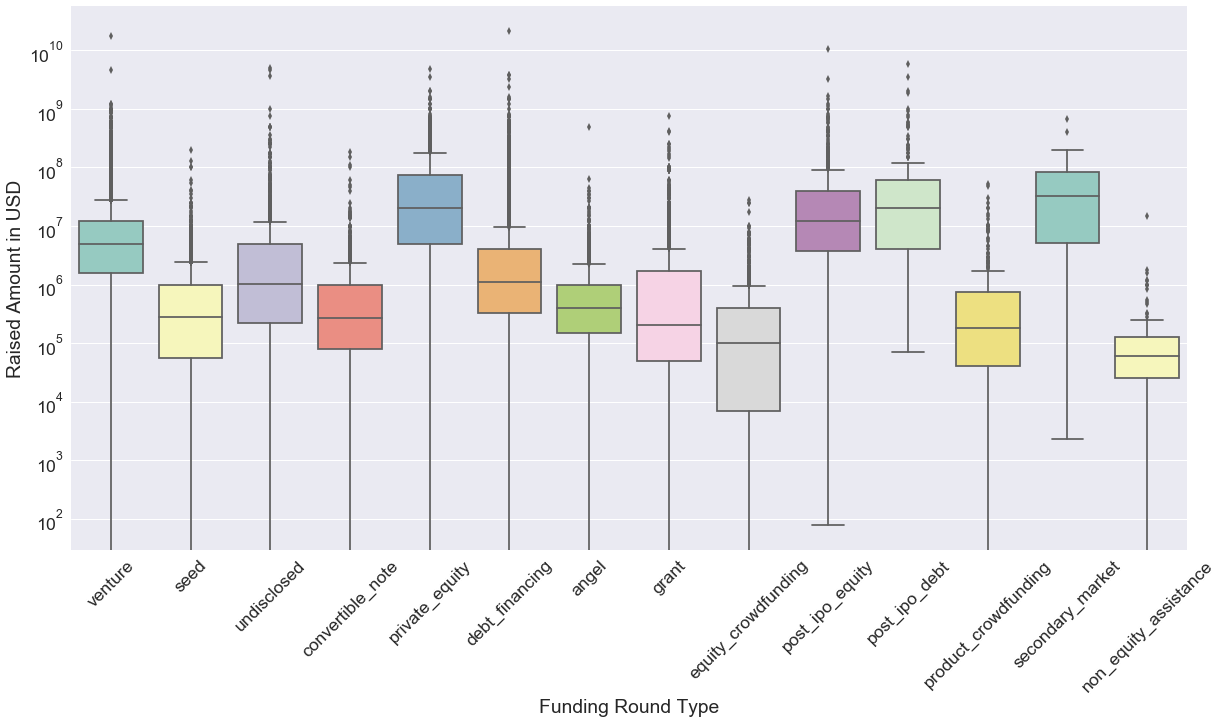

In [65]:
# Investments analysis across all Funding Type
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.75)
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame ,  palette="Set3")
plt.setp(ax.get_xticklabels(), rotation=45)
plt.yscale('log')
plt.xlabel('Funding Round Type')
plt.ylabel('Raised Amount in USD')
plt.title('')
plt.show()

In [66]:
# Investments analysis across 4 Funding Type 'venture', 'seed','private_equity'
mf_by_fundtype_summary = master_frame.groupby('funding_round_type')['raised_amount_usd'].agg(['sum','count','mean']) 
mf_by_fundtype_summary = mf_by_fundtype_summary.reset_index()
mf_by_fundtype_summary.rename(columns={'funding_round_type':'funding_round_type','sum':'Sum','count':'Count', 'mean':'Average'}, inplace=True)
mf_by_fundtype_summary = mf_by_fundtype_summary.sort_values(by='Count', ascending=False).reset_index(drop=True)
mf_by_fundtype_summary

,funding_round_type,Sum,Count,Average
0,venture,590126216876.00,50228,11748949.13
1,seed,16988238596.00,23602,719779.62
2,debt_financing,113884840886.00,6682,17043526.02
3,angel,4659255123.00,4860,958694.47
4,grant,9134424145.00,2124,4300576.34
5,private_equity,141925436105.00,1936,73308593.03
6,undisclosed,30441429697.00,1582,19242370.23
7,convertible_note,2103125572.00,1447,1453438.54
8,equity_crowdfunding,661116163.00,1228,538368.21
9,post_ipo_equity,51610606151.00,628,82182493.87


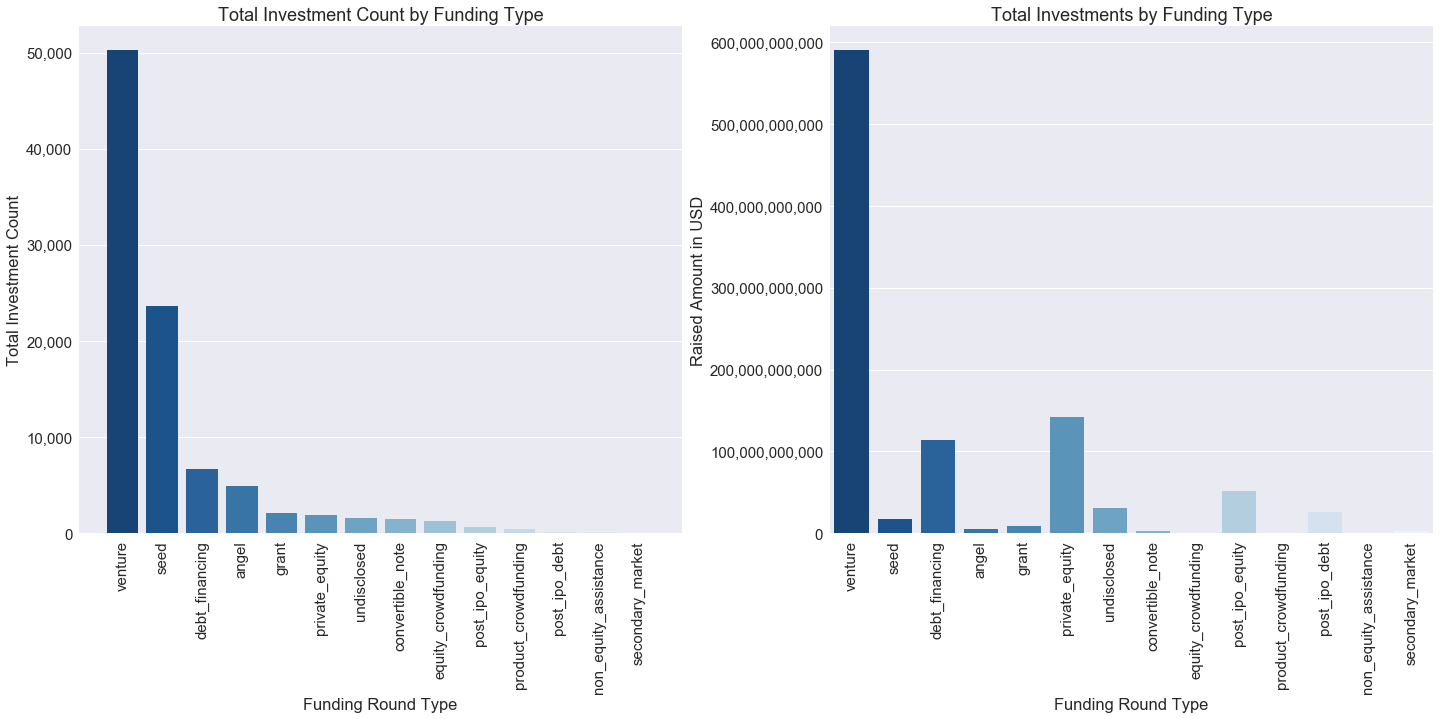

In [67]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import numpy as np


sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))

plt.subplot(121)
ax2 = sns.barplot(x='funding_round_type', y='Count', data=mf_by_fundtype_summary ,  palette="Blues_r")
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.autoscale(enable=True, axis='both')
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Funding Round Type')
plt.ylabel('Total Investment Count')
plt.title('Total Investment Count by Funding Type')


plt.subplot(122)
ax1 = sns.barplot(x='funding_round_type', y='Sum', data=mf_by_fundtype_summary ,  palette="Blues_r")
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Funding Round Type')
plt.ylabel('Raised Amount in USD')
plt.title('Total Investments by Funding Type')


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

In [68]:
# Investments analysis across 4 Funding Type 'venture','angel', 'seed','private_equity'
mf_by_fundtype_summary_3funding = mf_by_fundtype_summary[ mf_by_fundtype_summary['funding_round_type'].isin(['venture','seed','private_equity']) ]
mf_by_fundtype_summary_3funding

,funding_round_type,Sum,Count,Average
0,venture,590126216876.00,50228,11748949.13
1,seed,16988238596.00,23602,719779.62
5,private_equity,141925436105.00,1936,73308593.03


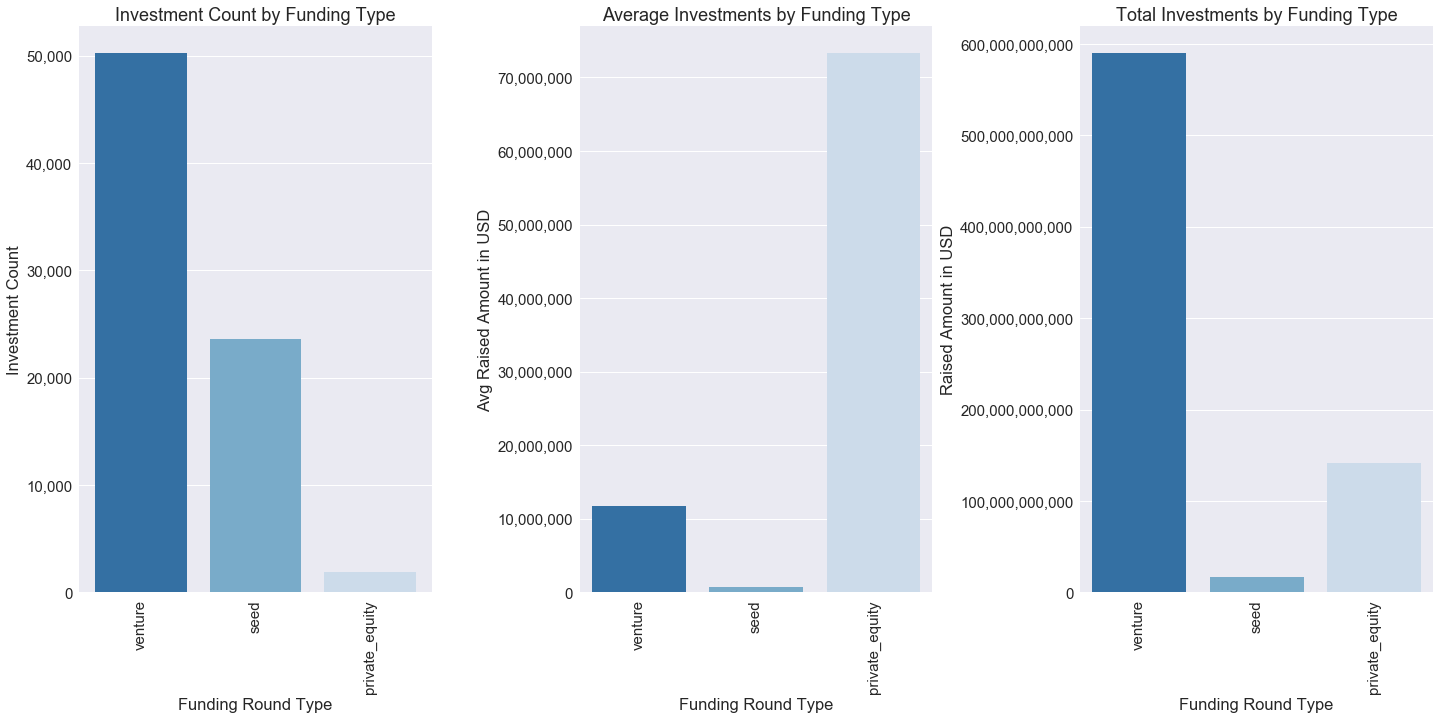

In [69]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import numpy as np


sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))

plt.subplot(131)
ax2 = sns.barplot(x='funding_round_type', y='Count', data=mf_by_fundtype_summary_3funding ,  palette="Blues_r")
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.autoscale(enable=True, axis='both')
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Funding Round Type')
plt.ylabel('Investment Count')
plt.title('Investment Count by Funding Type')


plt.subplot(132)
ax1 = sns.barplot(x='funding_round_type', y='Average', data=mf_by_fundtype_summary_3funding ,  palette="Blues_r")
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Funding Round Type')
plt.ylabel('Avg Raised Amount in USD')
plt.title('Average Investments by Funding Type')

plt.subplot(133)
ax1 = sns.barplot(x='funding_round_type', y='Sum', data=mf_by_fundtype_summary_3funding ,  palette="Blues_r")
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Funding Round Type')
plt.ylabel('Raised Amount in USD')
plt.title('Total Investments by Funding Type')


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

####  

####  

####    

#### Question: 2) A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear. 

In [70]:
master_frame.head()
master_frame_filter = master_frame.loc[master_frame['funding_round_type'] == 'venture']

df_raised_fund_by_country = master_frame_filter.groupby('country_code')['raised_amount_usd'].agg(['sum','count']) 
df_raised_fund_by_country = df_raised_fund_by_country.reset_index()
df_raised_fund_by_country.rename(columns={'country_code':'country_code','sum':'Sum','count':'Count'}, inplace=True)
top9 = df_raised_fund_by_country.sort_values(by='Sum', ascending=False).head(9).reset_index(drop=True)

top9

,country_code,Sum,Count
0,USA,422510842796.00,36139
1,CHN,39835418773.00,1564
2,GBR,20245627416.00,2055
3,IND,14391858718.00,824
4,CAN,9583332317.00,1256
5,FRA,7259536732.00,917
6,ISR,6907514579.00,796
7,DEU,6346959822.00,558
8,JPN,3363676611.00,274


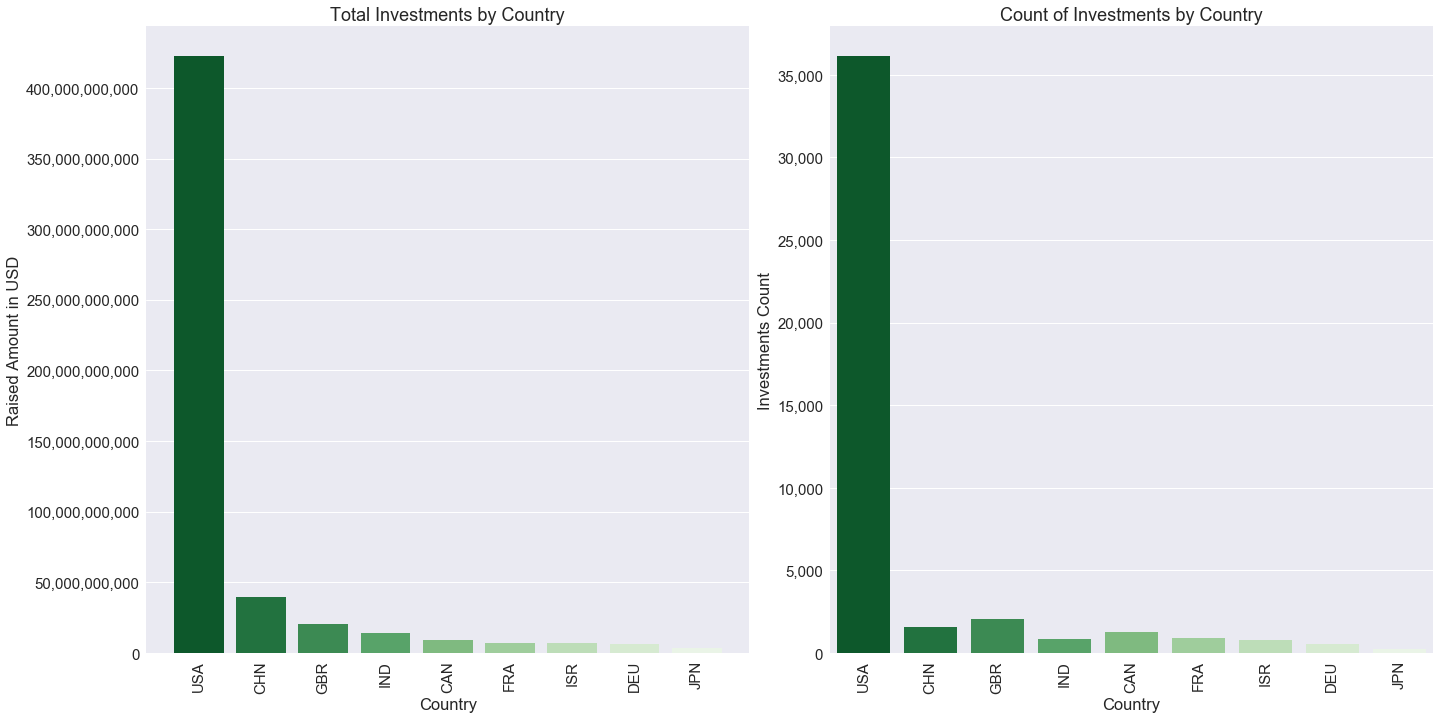

In [71]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import numpy as np


sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10))

plt.subplot(121)
ax2 = sns.barplot(x='country_code', y='Sum', data=top9 ,  palette="Greens_r")
ax2.get_yaxis().get_major_formatter().set_scientific(False)
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.autoscale(enable=True, axis='both')
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Country')
plt.ylabel('Raised Amount in USD')
plt.title('Total Investments by Country')


plt.subplot(122)
ax1 = sns.barplot(x='country_code', y='Count', data=top9 ,  palette="Greens_r")
ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Country')
plt.ylabel('Investments Count')
plt.title('Count of Investments by Country')


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

plt.show()

####  

####  

####    

#### Question: 3) #### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT) 

In [72]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.00,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.00,/organization/chefs-feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,media,Entertainment
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,media,Entertainment
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.00,/organization/huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,media,Entertainment
25,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,media,Entertainment
27,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.00,/organization/mediabong,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,media,Entertainment
28,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.00,/organization/newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,media,Entertainment
29,/organization/nokeena,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.00,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,media,Entertainment
31,/organization/nokeena,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.00,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,media,Entertainment
34,/organization/plumtv,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.00,/organization/plumtv,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,media,Entertainment


In [73]:
D1_top3 = D1.pivot_table(values = 'raised_amount_usd',index = ['country_code','main_sector'], aggfunc = {'sum','count'}).sort_values(by='count', ascending=False).head(3) 

In [74]:
D2_top3 = D2.pivot_table(values = 'raised_amount_usd',index = ['country_code','main_sector'], aggfunc = {'sum','count'}).sort_values(by='count', ascending=False).head(3) 

In [75]:
D3_top3 = D3.pivot_table(values = 'raised_amount_usd',index = ['country_code','main_sector'], aggfunc = {'sum','count'}).sort_values(by='count', ascending=False).head(3) 

In [76]:
venture_top3_country_sector = [D1_top3, D2_top3, D3_top3]
venture_top3_country_sector_result = pd.concat(venture_top3_country_sector)
venture_top3_country_sector_result = venture_top3_country_sector_result.reset_index()
venture_top3_country_sector_result.rename(columns={'country_code':'Country_Code', 'main_sector':'Sector', 'sum':'Sum','count':'Count'}, inplace=True)
venture_top3_country_sector_result

,Country_Code,Sector,Count,Sum
0,USA,Others,2950,26321007002.00
1,USA,"Social, Finance, Analytics, Advertising",2714,23807376964.00
2,USA,Cleantech / Semiconductors,2350,21633430822.00
3,GBR,Others,147,1283624289.00
4,GBR,"Social, Finance, Analytics, Advertising",133,1089404014.00
5,GBR,Cleantech / Semiconductors,130,1163990056.00
6,IND,Others,110,1013409507.00
7,IND,"Social, Finance, Analytics, Advertising",60,550549550.00
8,IND,"News, Search and Messaging",52,433834545.00


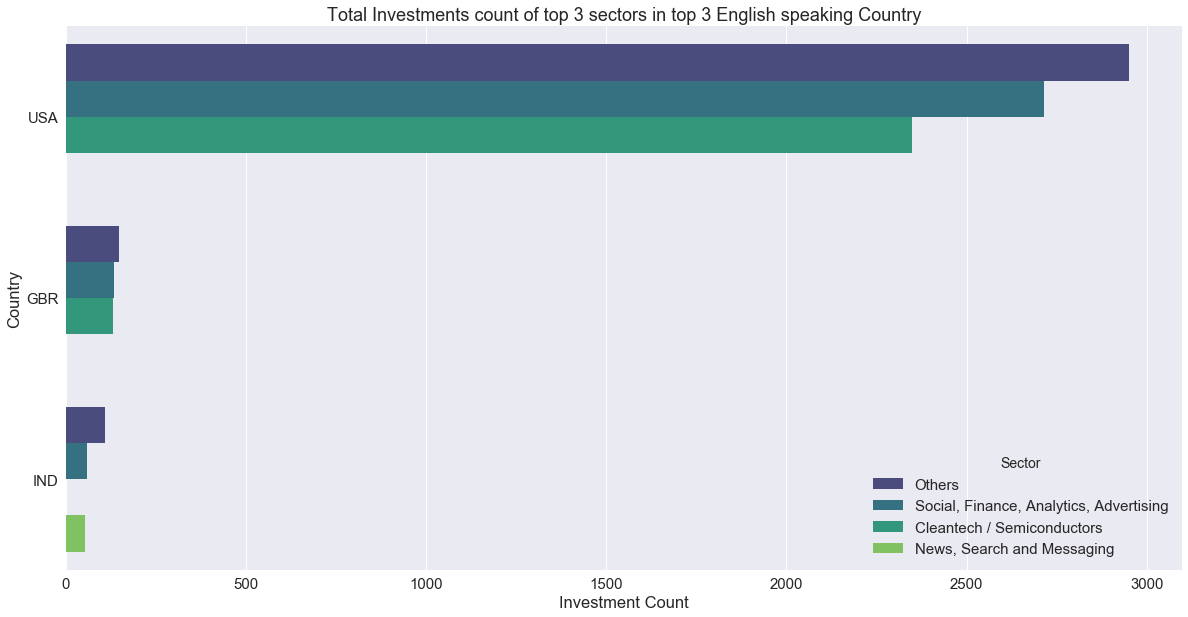

In [77]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns
import numpy as np

sns.set(font_scale=1.5)
plt.figure(figsize=(20, 10)) 

sns.barplot(y='Country_Code', x='Count', hue="Sector", data=venture_top3_country_sector_result, estimator=np.sum, palette="viridis")
plt.xlabel('Investment Count')
plt.ylabel('Country')
plt.title('Total Investments count of top 3 sectors in top 3 English speaking Country')

plt.show()